# Udacity Data Scientist Nanodegree Project 1
## Explore Airbnb Boston Data
### Data Sources:  
From https://www.kaggle.com/airbnb/boston
* Download calendar.csv
* Download listings.csv

From https://www.statista.com/statistics/202376/average-daily-rate-of-hotels-in-boston/
* Calculate average daily hotel price

### Follow the CRISP-DM process to analyze the selected data to answer questions
The CRISP-DM process includes these areas:    
* Business Understanding - What is the problem you are trying to solve?
* Data Understanding - What data is necessary to answer the questions?
* Data Preparation - Is there extra data, missing data, bad data?  Get it and clean it up.
* Modeling - Optional - If trying to predict something, then build a model
* Evaluation - Communicate insights to persuade others 
* Deployment - Optional - deploy model to make prediction
    
### Questions for this project
* What features are most important for predicting price?
* How well can price be predicted?
* On average how many days a month are units rented?
* Is location important?  What neighborhoods have units, how big are they, how is price impacted?
* What types of properties are available for rent?
* How does the cost of renting an Airbnb property compare to renting a hotel room?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import helper_visuals as hv
import helper_data_wrangling as hdw
import helper_modeling as hm

%matplotlib inline

listings = pd.read_csv('listings.csv')
calendar = pd.read_csv('calendar.csv')
# need to be able to look at all columns to get a sense of the data
pd.options.display.max_columns = None
listings.shape, calendar.shape

((3585, 95), (1308890, 4))

In [2]:
listings.head()
#listings.info()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

## Data Exploration

First I explored object type features by getting a list of features using and then plotting features of interest to look at value counts and see the distribution of data.  I used this to identify columns that were not of interest or didn't have meaningful data.
 * listings.select_dtypes('object').columns
 * listings.select_dtypes('float').columns
 * listings.select_dtypes('int').columns

I looked at listings.info() and listings.describe() to further explore the data looking for items that needed to be "cleaned" before starting analysis.

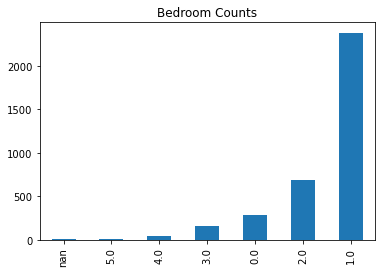

In [3]:
hv.bar_plot_col_counts(listings, 'bedrooms', True, False, 'Bedroom Counts')

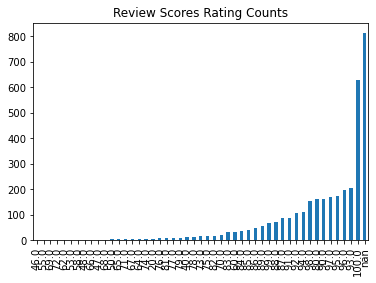

In [4]:
hv.bar_plot_col_counts(listings, 'review_scores_rating', True, False, 'Review Scores Rating Counts')

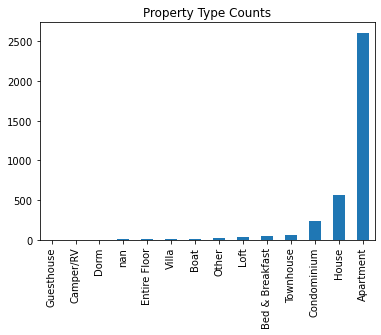

In [5]:
hv.bar_plot_col_counts(listings, 'property_type', True, False, 'Property Type Counts')

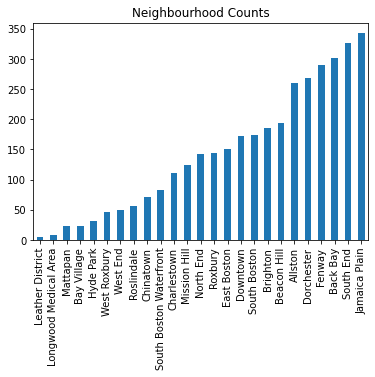

In [6]:
hv.bar_plot_col_counts(listings, 'neighbourhood_cleansed', True, False, 'Neighbourhood Counts')

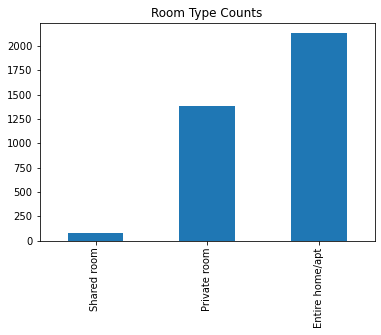

In [7]:
hv.bar_plot_col_counts(listings, 'room_type', True, False, 'Room Type Counts')

### Data Exploration Findings
* Identified columns that are not of interest for this project
* Since not analyzing text, I opted to drop all of the verbose columns
* Since not looking at URLs, I opted to drop all of the URL columns
* Also dropped columns where the data was all the same, so not meaningful, or had too much missing data
* Dropped most of the address related fields and kept neighbourhood_cleansed as a representative value
* Columns containing dollar figures were converted to float
* For missing data related to bedrooms, bathrooms, and beds, set to 1 which is the most common value
* For security_deposit, when there is missing data, set to 0 as the majority of rows are missing this value
* For cleaning_fee, fill nulls with the mean value cleaning fee since there is plenty of data available
* One area of interest is around the review data, so drop rows with missing review information.  
* Encode string data for modeling purposes
* Clean the calendar data to convert the date column to date format and get counts of property listings per year and month

In [8]:
# clean the data based on findings from exploration
listings_clean = hdw.clean_listings_data(listings, calendar, True)
listings_clean.head()

,id,host_id,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_is_superhost_f,host_is_superhost_t,host_identity_verified_f,host_identity_verified_t,neighbourhood_cleansed_Allston,neighbourhood_cleansed_Back Bay,neighbourhood_cleansed_Bay Village,neighbourhood_cleansed_Beacon Hill,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Charlestown,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Dorchester,neighbourhood_cleansed_Downtown,neighbourhood_cleansed_East Boston,neighbourhood_cleansed_Fenway,neighbourhood_cleansed_Hyde Park,neighbourhood_cleansed_Jamaica Plain,neighbourhood_cleansed_Leather District,neighbourhood_cleansed_Longwood Medical Area,neighbourhood_cleansed_Mattapan,neighbourhood_cleansed_Mission Hill,neighbourhood_cleansed_North End,neighbourhood_cleansed_Roslindale,neighbourhood_cleansed_Roxbury,neighbourhood_cleansed_South Boston,neighbourhood_cleansed_South Boston Waterfront,neighbourhood_cleansed_South End,neighbourhood_cleansed_West End,neighbourhood_cleansed_West Roxbury,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Condominium,property_type_Dorm,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,avg_monthly_days_rented_2016,avg_monthly_days_rented_2017
1,3075044,2572247,1,2,1.0,1.0,1.0,65.0,95.0,10.000000,0,0.0,2,15,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,1.30,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,3,0
2,6976,16701,1,2,1.0,1.0,1.0,65.0,0.0,68.380145,1,20.0,3,45,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0,0.47,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,11,0
3,1436513,6031442,1,4,1.0,1.0,2.0,75.0,100.0,50.000000,2,25.0,1,1125,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1.00,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,20,20
4,7651065,15396970,1,2,1.5,1.0,2.0,79.0,0.0,15.000000,1,0.0,2,31,29,99.0,10.0,10.0,10.0,10.0,9.0,10.0,2.25,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,10,0
5,12386020,64200298,2,2,1.0,1.0,1.0,75.0,0.0,30.000000,1,0.0,2,1125,8,100.0,10.0,10.0,10.0,10.0,9.0,10.0,1.70,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,19,27


In [9]:
listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2757 entries, 1 to 3583
Data columns (total 78 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              2757 non-null   int64  
 1   host_id                                         2757 non-null   int64  
 2   host_listings_count                             2757 non-null   int64  
 3   accommodates                                    2757 non-null   int64  
 4   bathrooms                                       2757 non-null   float64
 5   bedrooms                                        2757 non-null   float64
 6   beds                                            2757 non-null   float64
 7   price                                           2757 non-null   float64
 8   security_deposit                                2757 non-null   float64
 9   cleaning_fee                             

In [10]:
listings_clean.shape

(2757, 78)

## Standard Scaling, PCA, KMeans and Linear Regression Modelling

In [11]:
# Apply feature scaling to the listings data.
standard_scaler = preprocessing.StandardScaler()
# only fit here and separately transform as the scaler is needed later
standard_scaler.fit(listings_clean)
listings_scaled = standard_scaler.transform(listings_clean)
listings_scaled = pd.DataFrame(listings_scaled, index=listings_clean.index, columns=listings_clean.columns)

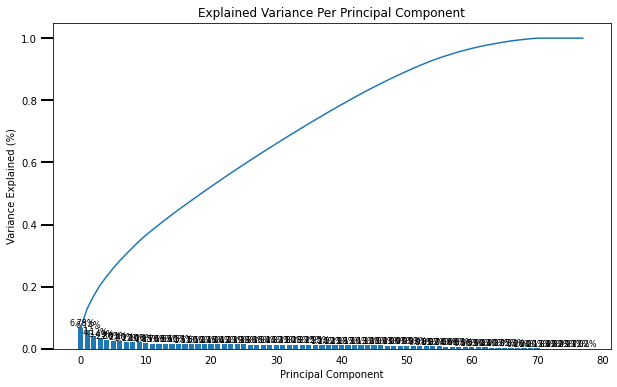

In [12]:
pca_full = PCA(random_state=42)
pca_full.fit(listings_scaled)
x_pca_full = pca_full.transform(listings_scaled)
hv.scree_plot(pca_full)

In [13]:
pca_result = hm.show_variance_by_dimension(pca_full, listings_scaled)

Sum of result Explained Variance: 0.9999


pca fitted and transformed


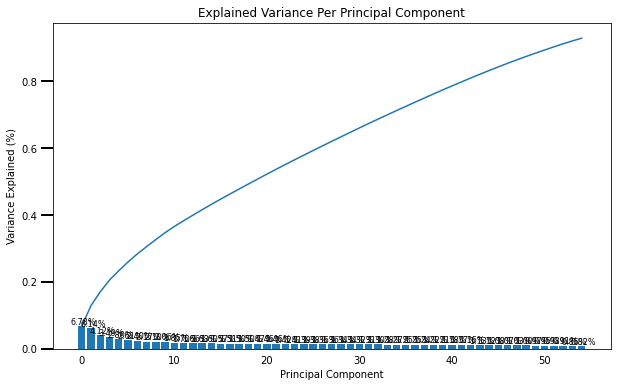

In [14]:
# Re-apply PCA to the data while selecting for number of components to retain.
# looking at 55 as the scree plot from the full set seems to level off around there
pca_55, x_pca_55 = hm.do_pca(listings_scaled, 55, False)
hv.scree_plot(pca_55)

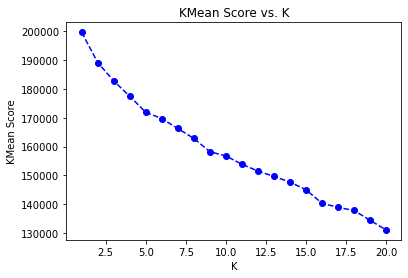

In [15]:
hv.plot_kmean_score_vs_k(x_pca_55, 20)

In [16]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
listings_model, listings_pred = hm.fit_kmeans_predict(14, x_pca_55, model_only=False)

kmeans fitted and predicted


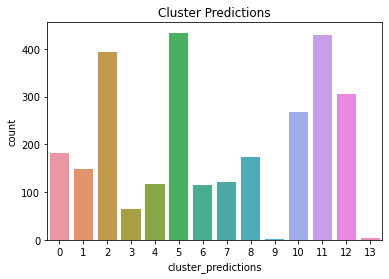

In [17]:
listings_pred_df = pd.DataFrame(listings_pred, columns=['cluster_predictions'])

sns.countplot(x='cluster_predictions', data=listings_pred_df) 
plt.title('Cluster Predictions')
plt.show();


In [18]:
# now use inverse_transformation to get back to see the features and values in the clusters
x_pca55_inverse = pca_55.inverse_transform(listings_model.cluster_centers_)
listings_inverse_unscaled = standard_scaler.inverse_transform(x_pca55_inverse)

listings_inverse_unscaled_df = pd.DataFrame(listings_inverse_unscaled, columns=listings_clean.columns)
pd.set_option('display.max_columns', None)
listings_inverse_unscaled_df

,id,host_id,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_is_superhost_f,host_is_superhost_t,host_identity_verified_f,host_identity_verified_t,neighbourhood_cleansed_Allston,neighbourhood_cleansed_Back Bay,neighbourhood_cleansed_Bay Village,neighbourhood_cleansed_Beacon Hill,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Charlestown,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Dorchester,neighbourhood_cleansed_Downtown,neighbourhood_cleansed_East Boston,neighbourhood_cleansed_Fenway,neighbourhood_cleansed_Hyde Park,neighbourhood_cleansed_Jamaica Plain,neighbourhood_cleansed_Leather District,neighbourhood_cleansed_Longwood Medical Area,neighbourhood_cleansed_Mattapan,neighbourhood_cleansed_Mission Hill,neighbourhood_cleansed_North End,neighbourhood_cleansed_Roslindale,neighbourhood_cleansed_Roxbury,neighbourhood_cleansed_South Boston,neighbourhood_cleansed_South Boston Waterfront,neighbourhood_cleansed_South End,neighbourhood_cleansed_West End,neighbourhood_cleansed_West Roxbury,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Condominium,property_type_Dorm,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,avg_monthly_days_rented_2016,avg_monthly_days_rented_2017
0,6.336424e+06,1.599110e+07,29.626817,7.383961,1.940567,3.060764,4.193683,353.723470,394.716680,119.474834,3.165326,22.761403,2.897765,-5.871645e+03,21.876884,93.592653,9.539594,9.540397,9.731288,9.754725,9.248500,9.228401,1.687449,0.807094,0.192906,0.186418,0.813582,0.051059,0.032600,0.016351,0.046850,0.024373,0.054305,0.004023,0.086300,0.038008,0.037786,0.010681,0.011786,0.207701,-0.000279,0.000062,0.000159,0.007012,0.051707,0.027083,0.076812,0.129362,0.020980,0.048414,-0.000061,0.016928,0.495697,-0.000375,0.054446,0.024106,0.000034,0.000147,0.000090,0.396811,0.010109,0.000383,0.018618,-0.000065,1.012710,0.001455,-0.014165,0.003182,0.002351,-0.004074,0.003972,0.994568,0.084124,0.166882,0.756748,-0.007754,15.783856,10.403887
1,9.270957e+06,2.788552e+07,38.804860,3.102271,1.199757,1.349107,1.650589,198.449639,205.311153,71.894836,1.655247,12.733095,2.582314,7.998035e+03,12.975167,94.739791,9.766453,9.607169,9.834990,9.846940,9.559692,9.393111,2.079692,0.946344,0.053656,0.258644,0.741356,0.038627,0.097307,0.007054,0.075459,-0.000773,0.053528,0.006915,0.060001,0.022361,0.051577,0.021466,-0.001474,0.075119,0.000121,-0.000023,-0.001069,0.020372,0.040500,0.019088,0.018897,0.181085,0.020872,0.185591,0.007714,-0.000311,-0.006025,0.000646,0.000249,0.996324,-0.000221,-0.000058,-0.000072,0.008350,0.000055,0.001530,-0.000905,0.000126,0.674565,0.315549,0.009886,-0.001921,-0.000320,0.008465,-0.000547,0.994323,0.190355,0.265126,0.546398,-0.001878,20.151555,17.283817
2,6.262097e+06,1.512988e+07,29.727100,3.248858,1.038497,1.090702,1.553306,189.307250,204.279783,82.992469,1.615663,13.627891,3.630081,1.724266e+03,30.520990,91.296739,9.389045,9.295141,9.606670,9.599152,9.566430,9.035267,1.749850,0.987775,0.012225,0.220645,0.779355,0.025174,0.001424,0.005903,0.185699,-0.000288,0.023133,0.028593,0.024678,0.100222,0.048193,0.023032,-0.000367,0.043639,-0.000040,0.002607,0.002491,0.013804,0.105007,0.007384,0.034403,0.025977,0.022404,0.269337,-0.000180,0.007770,0.976259,-0.000676,0.000301,-0.001958,-0.000057,-0.000059,0.002389,0.004653,0.008142,0.000885,0.

In [19]:
# calculate percentage of representation for each cluster 

cluster, count = np.unique(listings_pred_df, return_counts=True)
cluster_pct = count / sum(count) *100
azdias_cluster_pct = pd.DataFrame({'cluster': cluster, 'pct': cluster_pct})
azdias_cluster_pct

,cluster,pct
0,0,6.601378
1,1,5.404425
2,2,14.290896
3,3,2.321364
4,4,4.280015
5,5,15.741748
6,6,4.171201
7,7,4.388828
8,8,6.311208
9,9,0.036271


In [20]:
# clusters 0,9 are highest
# look at pca weights for the top and bottom 5 features by the top 5 highest representation
hm.sort_pca_by_weights(0, listings_scaled, pca_55, 5)


PCA By Weights Head:
    pca_weights                  feature_name
65    -0.309228        room_type_Private room
72    -0.145416  cancellation_policy_flexible
1     -0.102977                       host_id
0     -0.088424                            id
76    -0.085294  avg_monthly_days_rented_2016

PCA By Weights Tail:
    pca_weights               feature_name
5      0.278814                   bedrooms
6      0.297722                       beds
64     0.326240  room_type_Entire home/apt
3      0.340381               accommodates
7      0.348587                      price


In [21]:
hm.sort_pca_by_weights(9, listings_scaled, pca_55, 5)


PCA By Weights Head:
    pca_weights                        feature_name
22    -0.428695                   reviews_per_month
36    -0.270207  neighbourhood_cleansed_East Boston
23    -0.221505                 host_is_superhost_f
1     -0.206676                             host_id
14    -0.197769                   number_of_reviews

PCA By Weights Tail:
    pca_weights                          feature_name
24     0.221505                   host_is_superhost_t
77     0.223719          avg_monthly_days_rented_2017
72     0.232992          cancellation_policy_flexible
39     0.239077  neighbourhood_cleansed_Jamaica Plain
76     0.363078          avg_monthly_days_rented_2016


In [22]:
# there was a bunch of exploration, get fresh clean data again
listings_clean = hdw.clean_listings_data(listings, calendar, True)

# test/train split - create X and Y
y = listings_clean['review_scores_rating']
X = listings_clean.drop(['review_scores_rating'], axis=1)

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))


'The r-squared score for the model using only quantitative variables was -92.15041243580056 on 828 values.'

### R2 score > 1 means the model fits badly or is incorrect in some way

### Look at Random Forest Regression for modelling to see if it works better than Linear Regression

Price model train score: 0.9233567462314333
Number of features above the threshold of 0.005 is 24


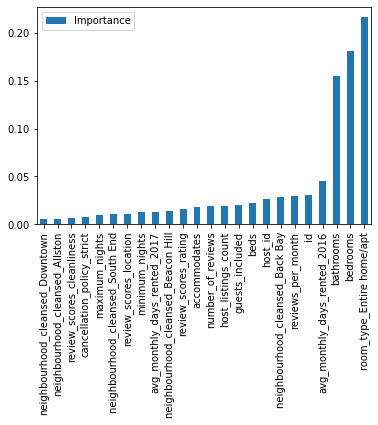

In [23]:
# start with fresh clean data again
listings_clean = hdw.clean_listings_data(listings, calendar, True)

# Try random forest regression - remove price and extra fee columns from features
y = listings_clean['price']
X = listings_clean.drop(['price','security_deposit','cleaning_fee','extra_people'], axis=1)
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X, y, test_size=0.3, random_state=42)

model_price = RandomForestRegressor(n_estimators=10, random_state=42)
model_price.fit(X_train_price, y_train_price)

print('Price model train score: {}'.format(model_price.score(X_train_price, y_train_price)))

hv.plot_feature_importance(X_train_price, model_price, 0.005)

In [24]:
# now tune the review_scores_rating model
rf_tuned_price_model = hm.rf_tune_parameters(model_price)
# Fit the random search model
rf_tuned_price_model.fit(X_train_price, y_train_price)
rf_tuned_price_model.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   22.6s finished


{'n_estimators': 200,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

Tuned Price train model score: 0.9952390675265782
Review Price test model score: 0.7273304761833133
Number of features above the threshold of 0.005 is 33


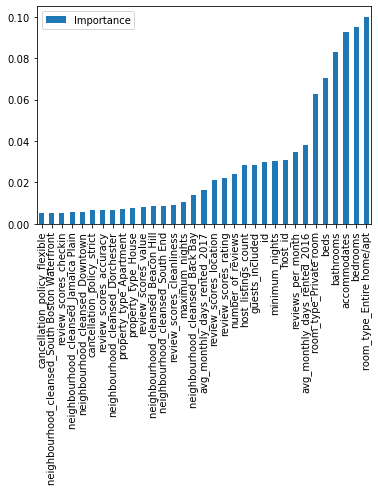

In [25]:
# now tune the price model with the output from hm.rf_tune_parameters
tuned_model_price = RandomForestRegressor(random_state=42, n_estimators=200, 
                                                         min_samples_split=3, min_samples_leaf=1, max_features='sqrt',
                                                         max_depth=None, bootstrap=False)
tuned_model_price.fit(X_train_price, y_train_price)
print('Tuned Price train model score: {}'.format(tuned_model_price.score(X_train_price, y_train_price)))
print('Review Price test model score: {}'.format(tuned_model_price.score(X_test_price, y_test_price)))

hv.plot_feature_importance(X_train_price, tuned_model_price, 0.005)

Number of features above the threshold of 0.01 is 19


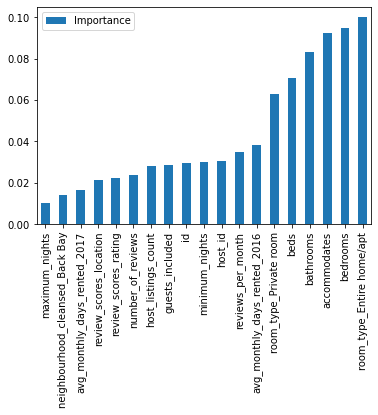

In [26]:
# look at features above a weight threshold 
hv.plot_feature_importance(X_train_price, tuned_model_price, 0.01)

### Results of Random Forest Modelling
* Base Price model train score: 0.9233567462314333
* Tuned Price train model score: 0.9952390675265782
* Review Price test model score: 0.7273304761833133

##### Features of most significance:
* room_type Entire home/apt
* bedrooms
* accommodates
* bathrooms
* beds
* room_type_Private room
* reviews_per_month


### General Data Questions
* On average how many days per month were units rented?
* What do prices look like by neighborhood?
* How many properties are there by neighborhood?
* What types of properties are there in Boston, what do they cost, and how many of them are there?
* What neighborhoods have properties that can accommodate large groups?

In [27]:
print('Average days per month rented in 2016: {}'.format(listings_clean.avg_monthly_days_rented_2016.mean()))
print('Average days per month rented in 2017: {}'.format(listings_clean.avg_monthly_days_rented_2017.mean()))

Average days per month rented in 2016: 18.73848385926732
Average days per month rented in 2017: 14.192237939789626


In [28]:
# get unencoded clean data for some neighborhood stats
listings_unencoded = hdw.clean_listings_data(listings, calendar, False)

In [29]:
# get neighbourhood stats
neighbourhood_cnt = listings_unencoded.groupby(['neighbourhood_cleansed']).id.count().to_frame(name='count').reset_index()
neighbourhood = listings_unencoded.groupby(['neighbourhood_cleansed']).price.mean().to_frame(name='avg_price').reset_index()

neighbourhood_stats = neighbourhood.set_index('neighbourhood_cleansed').join(neighbourhood_cnt.set_index('neighbourhood_cleansed')).reset_index()

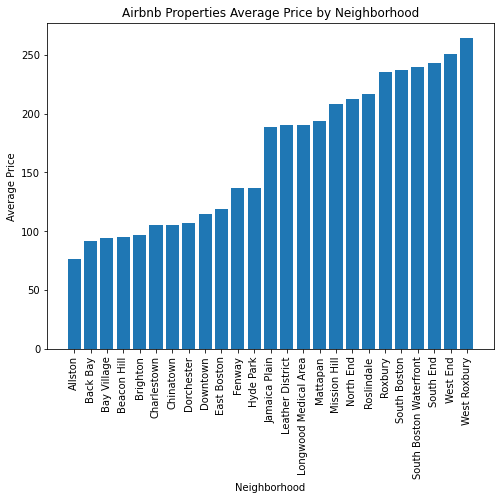

In [30]:
# plot average prices by neighborhood
plt.figure(figsize=(8,6))
plt.bar(neighbourhood_stats['neighbourhood_cleansed'], neighbourhood_stats['avg_price'].sort_values())
plt.xticks(rotation=90)
plt.ylabel('Average Price')
plt.xlabel('Neighborhood')
plt.title('Airbnb Properties Average Price by Neighborhood');

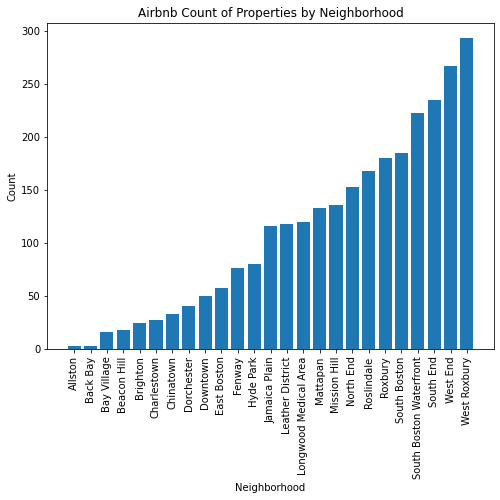

In [31]:
# plot counts per neighborhood
plt.figure(figsize=(8,6))
plt.bar(neighbourhood_stats['neighbourhood_cleansed'], neighbourhood_stats['count'].sort_values())
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.xlabel('Neighborhood')
plt.title('Airbnb Count of Properties by Neighborhood');

In [32]:
# get property type stats
property_type_cnt = listings_unencoded.groupby(['property_type']).id.count().to_frame(name='count').reset_index()
property_type = listings_unencoded.groupby(['property_type']).price.mean().to_frame(name='avg_price').reset_index()

property_type_stats = property_type.set_index('property_type').join(property_type_cnt.set_index('property_type')).reset_index()

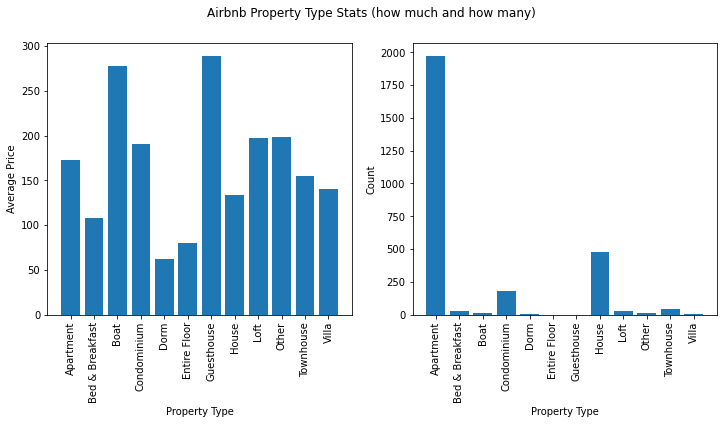

In [33]:
# Plot some property type stats
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.bar(property_type_stats['property_type'], property_type_stats['avg_price'])
plt.xticks(rotation=90)
plt.ylabel('Average Price')
plt.xlabel('Property Type')
plt.subplot(122)
plt.bar(property_type_stats['property_type'], property_type_stats['count'])
plt.xticks(rotation=90)
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.suptitle('Airbnb Property Type Stats (how much and how many)')
plt.show();

In [34]:
# get accommodates stats
accommodates_cnt = listings_unencoded.groupby(['accommodates']).id.count().to_frame(name='count').reset_index()
accommodates = listings_unencoded.groupby(['accommodates']).price.mean().to_frame(name='avg_price').reset_index()

accommodates_stats = accommodates.set_index('accommodates').join(accommodates_cnt.set_index('accommodates')).reset_index()

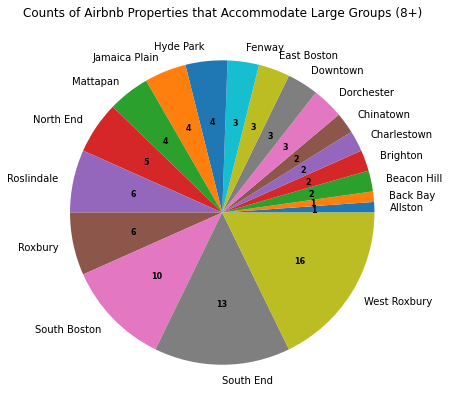

In [35]:
# plot counts of properties that accomodate large groups by neighborhood
large_properties = listings_unencoded.query('accommodates > 7')
large_properties_cnt = large_properties.groupby(['neighbourhood_cleansed']).id.count().to_frame(name='count').reset_index()


# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    #return "{:.1f}%\n( {:d} )".format(pct, absolute) 
    return "{:d}".format(absolute)

fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(large_properties_cnt['count'].sort_values(),  
                                  autopct = lambda pct: func(pct, large_properties_cnt['count']),
                                  labels = large_properties_cnt['neighbourhood_cleansed']) 
  
plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("Counts of Airbnb Properties that Accommodate Large Groups (8+)") 
  
# show plot 
plt.show() 

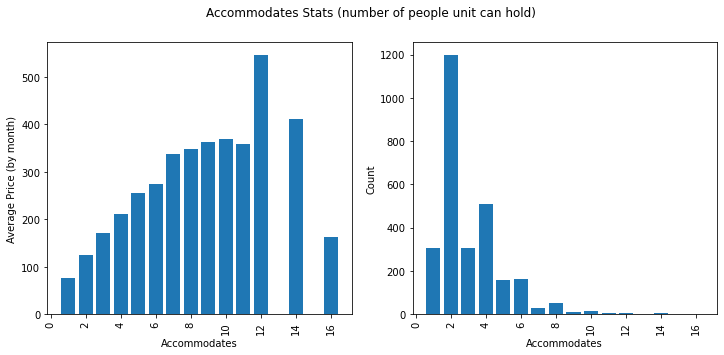

In [36]:
# now to plot Accommodates vs counts vs price
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.bar(accommodates_stats['accommodates'], accommodates_stats['avg_price'])
plt.xticks(rotation=90)
plt.ylabel('Average Price (by month)')
plt.xlabel('Accommodates')
plt.subplot(122)
plt.bar(accommodates_stats['accommodates'], accommodates_stats['count'])
plt.xticks(rotation=90)
plt.xlabel('Accommodates')
plt.ylabel('Count')
plt.suptitle('Accommodates Stats (number of people unit can hold)')
plt.show();

### Compare Airbnb costs to average hotel costs from the same time period

Source of average hotel price: https://www.statista.com/statistics/202376/average-daily-rate-of-hotels-in-boston/
Added the 5 quarters of data together and divided by 5 to come up with the $275 figure

In [37]:
# document some stats comparing Airbnb rentals to average hotel costs
avg_price = listings_clean.price.mean()
avg_price_accommodates_under5 = listings_clean[listings_clean['accommodates'] < 5].price.mean()

avg_security_deposit_under5 = listings_clean[listings_clean['accommodates'] < 5].security_deposit.mean()
avg_cleaning_fee_under5 = listings_clean[listings_clean['accommodates'] < 5].cleaning_fee.mean()

avg_price_plus_cleaning_under5 = avg_price_accommodates_under5 + avg_cleaning_fee_under5

print('Averages for properties that accommodate under 5 people')
print('Average security deposit: {}'.format(avg_security_deposit_under5))
print('Average cleaning fee: {}'.format(avg_cleaning_fee_under5))
print('Average price: {}'.format(avg_price_accommodates_under5))
print('Average price + cleaning fee: {}'.format(avg_price_plus_cleaning_under5))
print('Average hotel price: 275')
print('Average savings for Airbnb: {}'.format(275 - avg_price_accommodates_under5))
print('Average savings using Airbnb including fees: {}'.format(275 - avg_price_plus_cleaning_under5))


Averages for properties that accommodate under 5 people
Average security deposit: 114.90759930915371
Average cleaning fee: 60.552870441230276
Average price: 143.3933506044905
Average price + cleaning fee: 203.9462210457208
Average hotel price: 275
Average savings for Airbnb: 131.6066493955095
Average savings using Airbnb including fees: 71.05377895427921


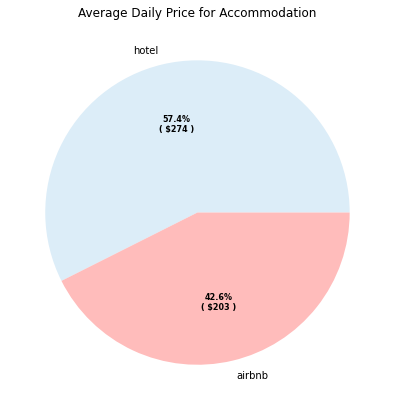

In [38]:
# pie plot the price comparison between airbnb and hotel
accommodation_type = ['hotel','airbnb']
avg_price = [275,204]

# Creating color parameters 
colors = ( "#dcedf8", "#ffbcbb") 

# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n( ${:d} )".format(pct, absolute) 

fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(avg_price,  
                                  autopct = lambda pct: func(pct, avg_price),
                                  labels = accommodation_type,
                                  colors = colors) 
  
plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("Average Daily Price for Accommodation") 
  
# show plot 
plt.show() 


## General Conclusions

* With some data cleaning and feature engineering, the data is suitable for predicting rental prices.
* Random Forest Regression modelling worked much better than Linear Regression.  There might be better results if more different types of models are explored.
* With various plots and queries, was able to find answers to many questions to find insights about prices per neighborhood in Boston, and property types and sizes, and even find the cost savings that could be realized by renting an Airbnb property rather than a hotel.